# **Angular correlation between quark-antiquark pairs**

Read data from files and compute the angle between the quark and antiquark pair.

In [1]:
import numpy as np
import os

current_path = os.getcwd() 

pTs = [0.5, 5.0, 10.0]
ntp = [10, 80, 10]
events, nq = 10, 15

angles = {}
i = 0
for pT in pTs:
    folder = 'pb+pb_5020gev_su2_interp_pT_' + str(pT)
    directory = current_path + '/results/' + folder + '/'

    angles_pT = []

    for ev in range(1, events+1):
        for tp in range(1, ntp[i]+1):
            for q in range(1, nq+1):

                file_name_q = 'ev_' + str(ev) + '_q_' + str(q) + '_tp_' + str(tp) + '.npz'
                file_path_q = directory + file_name_q
                data_q = np.load(file_path_q)
                index_q = 0
                pT_q = [data_q['pmu'][index_q, 1], data_q['pmu'][index_q, 2]]

                file_name_aq = 'ev_' + str(ev) + '_aq_' + str(q) + '_tp_' + str(tp) + '.npz'
                file_path_aq = directory + file_name_aq
                data_aq = np.load(file_path_aq)
                index_aq = 0
                pT_aq = [data_aq['pmu'][index_aq, 1], data_aq['pmu'][index_aq, 2]]

                file_name_q = 'ev_' + str(ev) + '_q_' + str(q) + '_tp_' + str(tp) + '.npz'
                file_path_q = directory + file_name_q
                data_q = np.load(file_path_q)
                index_q = len(data_q['pmu'][:, 0]) - 1
                pT_q = [data_q['pmu'][index_q, 1], data_q['pmu'][index_q, 2]]

                file_name_aq = 'ev_' + str(ev) + '_aq_' + str(q) + '_tp_' + str(tp) + '.npz'
                file_path_aq = directory + file_name_aq
                data_aq = np.load(file_path_aq)
                index_aq = len(data_aq['pmu'][:, 0]) - 1
                pT_aq = [data_aq['pmu'][index_aq, 1], data_aq['pmu'][index_aq, 2]]

                unit_vector_pT_q = pT_q / np.linalg.norm(pT_q)
                unit_vector_pT_aq = pT_aq / np.linalg.norm(pT_aq)
                dot_product = np.dot(unit_vector_pT_q, unit_vector_pT_aq)
                angle = np.arccos(dot_product) * 180 / np.pi
                # angle = np.arccos(dot_product)
                angles_pT.append(angle)

    angles[str(pT)] = angles_pT
    i=i+1

Plot the results.

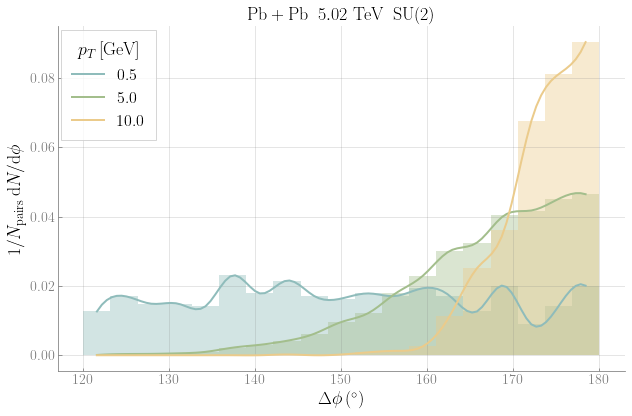

In [2]:
from matplotlib import pyplot as plt
import scipy.stats as stats
from scipy.interpolate import interp1d

plt.rcParams['text.usetex'] = True
plt.rcParams["figure.figsize"] = (9, 6)
plt.rcParams.update({'font.size':14})

fig = plt.figure()
ax = plt.subplot(111)
plt.title(r'$\mathrm{Pb+Pb}\,\,\, 5.02\,\,\mathrm{TeV}\,\,\,\mathrm{SU(2)}$', size = 18)
plt.ylabel(r'$1/N_\mathrm{pairs}\,\mathrm{d}N/\mathrm{d}\phi$', size = 18)
plt.xlabel(r'$\Delta\phi\,(^\circ)$', size = 18)

ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines['bottom'].set_color('gray')
ax.spines['left'].set_color('gray') 
ax.tick_params(direction='in', colors='gray',grid_color='gray', grid_alpha=0.5)

plt.grid(color = 'gray', linestyle = '-', linewidth = 1, alpha=0.2)

nbins = 20
nbins_interp = 100
phi_low, phi_high = 120, 180

colors = ['#8FBCBB', '#A3BE8C', '#EBCB8B']
pTs = [0.5, 5.0, 10.0]
labels = [r'$0.5$', r'$5.0$', r'$10.0$']
i=0

for pT in pTs:

    n, bins, _ = plt.hist(angles[str(pT)], bins=np.linspace(phi_low, phi_high, nbins), density=True, alpha=0.4, color=colors[i])  
    bin_centers = 0.5*(bins[1:]+bins[:-1])

    bin_interp = np.linspace(bin_centers[0], bin_centers[len(bin_centers)-1], nbins_interp)
    cubic_interp = interp1d(bin_centers, n, kind='cubic')
    cubic_results = cubic_interp(bin_interp)
    plt.plot(bin_interp, cubic_results, color=colors[i], linewidth = 2.0, label=labels[i])
    i=i+1

leg = ax.legend(fontsize = 16, loc = 'upper left')
leg.get_frame().set_boxstyle('square')
leg.set_title(r'$p_T\,\mathrm{[GeV]}$',prop={'size':18})

plt.tight_layout()
plt.show()